# Pandas

## Introduction

[Documentation](https://pandas.pydata.org/docs/#pandas-documentation)

___Pandas is well suited for many different kinds of data:___

* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) (1-dimensional) and [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. 

___Here are just a few of the things that pandas does well:___

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.

___Mutability and copying of data___

All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable.  
* The length of a __Series__ cannot be changed
* Columns can be inserted into a __DataFrame__. 

However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.

## Basics

* The columns and the index are known as the axes. The index is axis 0, and the columns are axis 1.
* Pandas uses `NaN` (not a number) to represent missing values.
* By default, pandas shows 60 rows and 20 columns, but we have limited that in the book, so the data fits in a page.
* The `.head` method accepts an optional parameter, `n`, which controls the number of rows displayed. The default value for `n` is 5. Similarly, the `.tail` method returns the last `n` rows. The `.sample`method returns a random sample of items from an axis of object.

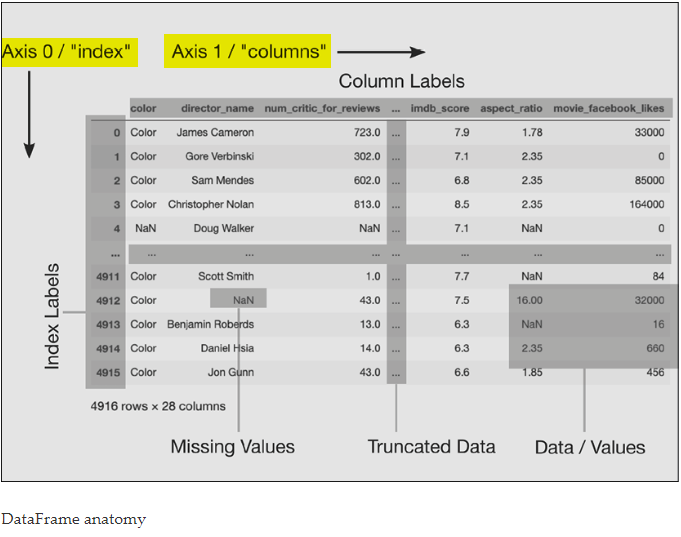


### Data types

https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#datetime-data

In very broad terms, data may be classified as either __continuous__ or __categorical__. 
* Continuous data is always numeric and represents some kind of measurements, such as height, wage, or salary. Continuous data can take on an infinite number of possibilities. 
* Categorical data, on the other hand, represents discrete, finite amounts of values such as car color, type of poker hand, or brand of cereal.

The following describes common pandas data types:

* float – The NumPy float type, which supports missing values
* int – The NumPy integer type, which does not support missing values
* 'Int64' – pandas nullable integer type. __Note: This is different than `int64`__
* `object` – The NumPy type for storing strings (and mixed types). The object data type is the one data type that is unlike the others. A column that is of the object data type may contain values that are of any valid Python object. __Typically, when a column is of the object data type, it signals that the entire column is strings. When you load CSV files and string columns are missing values, pandas will stick in a NaN (float) for that cell. So the column might have both object and float (missing) values in it.__
* 'category' – pandas categorical type, which does support missing values. As pandas grew larger and more popular, the `object` data type proved to be too generic for all columns with string values. __pandas created its own categorical data type to handle columns of strings (or numbers) with a fixed number of possible values.__
* bool – The NumPy Boolean type, which does not support missing values (None becomes False, np.nan becomes True)
* 'boolean' – pandas nullable Boolean type
* datetime64[ns] – The NumPy date type, which does support missing values (NaT)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# All the %-prefixed commands are special Jupyter extensions, not regular Python statements.
%matplotlib inline

## DataFrame
https://pandas.pydata.org/docs/reference/frame.html

In [2]:
stocks = pd.read_csv("data/stocks.csv")
print(type(stocks))
display(stocks)

print('shape = ', stocks.shape)
print('size = ', stocks.size)
print('ndim = ', stocks.ndim)
print('len = ', len(stocks))

<class 'pandas.core.frame.DataFrame'>


,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


shape =  (3, 4)
size =  12
ndim =  2
len =  3


### General properties and methods

* The index and the columns represent the same thing but along different axes. They are occasionally referred to as the row index and column index.  
* If you do not specify the index, pandas will use a `RangeIndex`. A `RangeIndex` is a subclass of an `Index` that is analogous to Python's `range` object. __Its entire sequence of values is not loaded into memory until it is necessary to do so, thereby saving memory.__  
* When possible, Index objects are implemented using hash tables that allow for very fast selection and data alignment. They are ordered and can have duplicate entries.
* Beneath the `index`, `columns`, and `data` are NumPy `ndarrays`.

In [3]:
# componentes of DataFrame

columns = stocks.columns
index = stocks.index
data = stocks.to_numpy()

display(index)
display(columns)

# Beneath the index, columns, and data are NumPy ndarrays.
display(data)
display(index.to_numpy())
display(columns.to_numpy())

RangeIndex(start=0, stop=3, step=1)

Index(['Symbol', 'Shares', 'Low', 'High'], dtype='object')

array([['AAPL', 40, 135, 170],
       ['AMZN', 8, 900, 1125],
       ['TSLA', 50, 220, 400]], dtype=object)

array([0, 1, 2], dtype=int64)

array(['Symbol', 'Shares', 'Low', 'High'], dtype=object)

In [4]:
# data type of each columns
display(stocks.dtypes)

# counts of each data type
display(stocks.dtypes.value_counts())

# number of non-missing values for each column
display(stocks.count())

Symbol    object
Shares     int64
Low        int64
High       int64
dtype: object

int64     3
object    1
dtype: int64

Symbol    3
Shares    3
Low       3
High      3
dtype: int64

In [5]:
# get info on the dataframe
display(stocks.info())

# get info on the dataframe
display(stocks.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  3 non-null      object
 1   Shares  3 non-null      int64 
 2   Low     3 non-null      int64 
 3   High    3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


None

,Shares,Low,High
count,3.000000,3.000000,3.000000
mean,32.666667,418.333333,565.000000
std,21.939310,419.295043,498.422512
min,8.000000,135.000000,170.000000
25%,24.000000,177.500000,285.000000
50%,40.000000,220.000000,400.000000
75%,45.000000,560.000000,762.500000
max,50.000000,900.000000,1125.000000


### Accessing Rows and Columns

Selecting a single column from a DataFrame returns a Series

In [6]:
display(stocks)

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


#### Accessing columns

In [7]:
display(stocks['Low'])
display(stocks.Low)

0    135
1    900
2    220
Name: Low, dtype: int64

0    135
1    900
2    220
Name: Low, dtype: int64

We can also index off of the `.loc` and `.iloc` attributes to pull out a Series. The former allows us to pull out by column name, while the latter by position. These are referred to as _label-based_ and _positional-based_ in the pandas documentation.

`loc/iloc[row_selector, column_selector]`

In [8]:
display(stocks.loc[:, 'Low'])
display(stocks.iloc[:, 2])
display(stocks.iloc[:1, 2])

0    135
1    900
2    220
Name: Low, dtype: int64

0    135
1    900
2    220
Name: Low, dtype: int64

0    135
Name: Low, dtype: int64

#### Accessing Rows

In [9]:
display(stocks)
display(stocks.loc[0, :])
display(stocks.loc[0:1, :])

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


Symbol    AAPL
Shares      40
Low        135
High       170
Name: 0, dtype: object

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125


#### Accessing multiple columns

In [10]:
# This can also be used to order columns
display(stocks[
    [
        "High",
        "Low"
    ]
])

display(type(stocks[["High"]]))
display(type(stocks["High"]))

display(type(stocks.loc[:, ["Low"]]))
display(type(stocks.loc[:, "Low"]))

,High,Low
0,170,135
1,1125,900
2,400,220


pandas.core.frame.DataFrame

pandas.core.series.Series

pandas.core.frame.DataFrame

pandas.core.series.Series

#### Selecting and Filtering Columns by Data Types and Names

In [11]:
display(stocks)
display(stocks.select_dtypes(include=["number"]))
display(stocks.select_dtypes(exclude=[np.int64]))

# searches column names (or index labels) based on which parameter is used. 
# like parameter is used to search for all the columns or index names that contain the exact string 'AAPL'
display(stocks.filter(like='Low'))

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Shares,Low,High
0,40,135,170
1,8,900,1125
2,50,220,400


,Symbol
0,AAPL
1,AMZN
2,TSLA


,Low
0,135
1,900
2,220


### Ordering Columns

In [12]:
display(stocks)

order = ['Shares', 'High', 'Low']
        
display(stocks[order])

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Shares,High,Low
0,40,170,135
1,8,1125,900
2,50,400,220


### Renaming Columns

In [13]:
display(stocks)

column_dict = {column : column.lower() for column in stocks.columns.to_list()}
display(stocks.rename(columns=column_dict)) # not an in place change

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,symbol,shares,low,high
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


### Setting and Renaming Index

In [14]:
display(stocks)
index_map={'AAPL': 'Apple Inc.'}

display(stocks.set_index('Symbol').rename(index=index_map))

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Shares,Low,High
Symbol,,,
Apple Inc.,40,135,170
AMZN,8,900,1125
TSLA,50,220,400


### Processing data in different columns together

In [15]:
low_high_1 = stocks.Low + stocks.High
low_high_2 = stocks.loc[:, ['Low', 'High']].sum(axis="columns")

display(type(low_high_1))

display(low_high_1)
display(low_high_2)

pandas.core.series.Series

0     305
1    2025
2     620
dtype: int64

0     305
1    2025
2     620
dtype: int64

### Creating Columns
`assign` method - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html
`insert` method - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html

In [16]:
stocks_copy = stocks.copy(deep=False)

display(stocks_copy)

display(stocks_copy.assign(vol_gtr_45= lambda col: col.Shares > 45))
display(stocks_copy.assign(vol_gtr_45= stocks_copy.Shares > 45))

stocks_copy.insert(loc=0, column="Difference", value=stocks_copy["High"] - stocks_copy["Low"])
stocks_copy['change_percentage'] = 0
stocks_copy['average_price'] = stocks.Low + stocks.High / 2
display(stocks_copy)

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Symbol,Shares,Low,High,vol_gtr_45
0,AAPL,40,135,170,False
1,AMZN,8,900,1125,False
2,TSLA,50,220,400,True


,Symbol,Shares,Low,High,vol_gtr_45
0,AAPL,40,135,170,False
1,AMZN,8,900,1125,False
2,TSLA,50,220,400,True


,Difference,Symbol,Shares,Low,High,change_percentage,average_price
0,35,AAPL,40,135,170,0,220.0
1,225,AMZN,8,900,1125,0,1462.5
2,180,TSLA,50,220,400,0,420.0


### Chaining

In [17]:
display(stocks)
display(stocks.sum())
display(stocks.sum()[1:].sum())
display(stocks[['Shares', 'High', 'Low']].sum().sum())

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


Symbol    AAPLAMZNTSLA
Shares              98
Low               1255
High              1695
dtype: object

3048

3048

### Operations on DataFrame

In [18]:
display(stocks)

# plus operator, which attempts to add a scalar value to each value of each column of the DataFrame
display(stocks.iloc[:, 1:] + 1)

# chaining
display(stocks.iloc[:, 1:].add(1))

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Shares,Low,High
0,41,136,171
1,9,901,1126
2,51,221,401


,Shares,Low,High
0,41,136,171
1,9,901,1126
2,51,221,401


### Deleting Columns

In [19]:
display(stocks.drop(columns='High'))
display(stocks)

,Symbol,Shares,Low
0,AAPL,40,135
1,AMZN,8,900
2,TSLA,50,220


,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


### Creating DataFrames from scratch

In [20]:
symbols = ['RIL', 'TTM']
quotes = [1324.2, 12.4]

stocks_data_frame_dict = {'symbol': symbols, 'quote': quotes}

# By default, pandas will create a RangeIndex 
df_1 = pd.DataFrame(stocks_data_frame_dict, dtype=np.float16)
display(df_1)
display(df_1.index)

# sepcify our own index
df_2 = pd.DataFrame(stocks_data_frame_dict, index=['a', 'b'])
display(df_2)
display(df_2.index)

# list of dicts
list_of_dicts = [
    {
        'symbol' : 'NSDQ',
        'quote' : 33
    },
    {
        'symbol' : 'AAPL',
        'quote' : 333.1,
        'volume': 22
    },
    {
        'symbol' : 'ZNGA',
        'quote' : None,
        'volume': 'Delisted'
    }
]

display(pd.DataFrame(list_of_dicts))

,symbol,quote
0,RIL,1324.000000
1,TTM,12.398438


RangeIndex(start=0, stop=2, step=1)

,symbol,quote
a,RIL,1324.2
b,TTM,12.4


Index(['a', 'b'], dtype='object')

,symbol,quote,volume
0,NSDQ,33.0,NaN
1,AAPL,333.1,22
2,ZNGA,NaN,Delisted


### Exporting DataFarme

DataFrames can be exported using few methods on the DataFrame that start with to_. Example: to_csv, to_clipboard, to_json.

In [21]:
display(stocks)

# write json to string buffer

from io import StringIO
fout = StringIO()

stocks.to_json(fout)
display(fout.getvalue())

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


'{"Symbol":{"0":"AAPL","1":"AMZN","2":"TSLA"},"Shares":{"0":40,"1":8,"2":50},"Low":{"0":135,"1":900,"2":220},"High":{"0":170,"1":1125,"2":400}}'

### Efficiently reading data into DataFrame

Look into pd.read_ methods

Tips:
* Read a limited number of rows/lines in a file. Example using the `nrows` param in `pd.read_csv`
* Specify a smaller `dtype` for a given column than the default which might take more space
* If there are very unique values in a column, use the `category` data type
* If you can process chunks of the data at a time and do not need all of it in memory, you can use the `chunksize` parameter

#### Data type is inferend by Pandas

> Because CSV files contain no information about type, pandas tries to infer the types of the columns. If all of the values of a column are whole numbers and none of them are missing, then it uses the int64 type. If the column is numeric but not whole numbers, or if there are missing values, it uses float64. These data types may store more information that you need. For example, if your numbers are all below 200, you could use a smaller type, like np.int16 (or np.int8 if they are all positive).

> As of pandas 0.24, there is a new type 'Int64' (note the capitalization) that supports integer types with missing numbers. You will need to specify it with the dtype parameter if you want to use this type, as pandas will convert integers that have missing numbers to float64.

> If the column turns out to be non-numeric, pandas will convert it to an object column, and treat the values as strings. String values in pandas take up a bunch of memory as each value is stored as a Python string. If we convert these to categoricals, pandas will use much less memory as it only stores the string once, rather than creating new strings (even if they repeat) for every row.

The pandas library can also read CSV files found on the internet. You can point the read_csv function to the URL directly.

#### CSV and JSONs

In [22]:
# Note the memory usage in the output

# reading the whole file
display(pd.read_csv('data/stocks.csv').info())

# reading a limited number of rows
display(pd.read_csv('data/stocks.csv', 
                    nrows=1,
                    dtype={'Low': np.int32}
                    ).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  3 non-null      object
 1   Shares  3 non-null      int64 
 2   Low     3 non-null      int64 
 3   High    3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  1 non-null      object
 1   Shares  1 non-null      int64 
 2   Low     1 non-null      int32 
 3   High    1 non-null      int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 156.0+ bytes


None

#### SQL

1. Create a SQLite database to store the Beatles information

``` python
>>> import sqlite3
>>> con = sqlite3.connect("data/beat.db")
>>> with con:
...     cur = con.cursor()
...     cur.execute("""DROP TABLE Band""")
...     cur.execute(
...         """CREATE TABLE Band(id INTEGER PRIMARY KEY,
...         fname TEXT, lname TEXT, birthyear INT)"""
...     )
...     cur.execute(
...         """INSERT INTO Band VALUES(
...         0, 'Paul', 'McCartney', 1942)"""
...     )
...     cur.execute(
...         """INSERT INTO Band VALUES(
...         1, 'John', 'Lennon', 1940)"""
...     )
...     _ = con.commit()
```

2. Read the table from the database into a DataFrame. Note that if we are reading a table, we need to use a SQLAlchemy connection. SQLAlchemy is a library that abstracts databases for us:

``` python
>>> import sqlalchemy as sa
>>> engine = sa.create_engine(
...     "sqlite:///data/beat.db", echo=True
... )
>>> sa_connection = engine.connect()
>>> beat = pd.read_sql(
...     "Band", sa_connection, index_col="id"
... )
>>> beat
   fname      lname  birthyear
id                            
0   Paul  McCartney       1942
1   John     Lennon       1940
```

3. Read from the table using a SQL query. This can use a SQLite connection or a SQLAlchemy connection:
``` python
>>> sql = """SELECT fname, birthyear from Band"""
>>> fnames = pd.read_sql(sql, con)
>>> fnames
  fname  birthyear
0  Paul       1942
1  John       1940
```

The pandas library leverages the SQLAlchemy library, which can talk to most SQL databases. This lets you create DataFrames from tables, or you can run a SQL select query and create the DataFrame from the query.

#### Reading from HTML

In [23]:
url = 'https://ssltsw.forexprostools.com'

dfs = pd.read_html(url)

display(len(dfs))
display(dfs)

4

[    0   1        2         3            4   5
 0 NaN NaN  EUR/USD    1.1795         Sell NaN
 1 NaN NaN  GBP/USD    1.3069   Strong Buy NaN
 2 NaN NaN  USD/JPY  105.9700  Strong Sell NaN
 3 NaN NaN  AUD/USD    0.7167   Strong Buy NaN
 4 NaN NaN  USD/CAD    1.3220   Strong Buy NaN
 5 NaN NaN  EUR/JPY  125.0000  Strong Sell NaN
 6 NaN NaN  EUR/CHF    1.0756      Neutral NaN,
     0   1              2          3            4   5
 0 NaN NaN           Gold  1934.6500  Strong Sell NaN
 1 NaN NaN         Silver    26.5850  Strong Sell NaN
 2 NaN NaN         Copper     2.9242  Strong Sell NaN
 3 NaN NaN  Crude Oil WTI    42.4300  Strong Sell NaN
 4 NaN NaN      Brent Oil    45.5500   Strong Buy NaN
 5 NaN NaN    Natural Gas     2.6240   Strong Buy NaN
 6 NaN NaN    US Coffee C   119.8500  Strong Sell NaN,
     0   1              2         3            4   5
 0 NaN NaN  Euro Stoxx 50   3331.74         Sell NaN
 1 NaN NaN        S&P 500   3431.28   Strong Buy NaN
 2 NaN NaN            DAX  1306

## Series
https://pandas.pydata.org/docs/reference/series.html

In [24]:
# get series out of DataFrame

symbol_series = stocks.Symbol
shares_series = stocks.Shares

display(type(symbol_series))
display(symbol_series.dtype)
display(shares_series.dtype)

pandas.core.series.Series

dtype('O')

dtype('int64')

### Series with Index

In [25]:
series = pd.Series(data=stocks.High.to_numpy(), index=stocks.Symbol.to_numpy())
display(series)

display(type(series['AAPL']))
display(type(series[['AAPL']]))

AAPL     170
AMZN    1125
TSLA     400
dtype: int64

numpy.int64

pandas.core.series.Series

### Selecting data with labels

Select data based on the lexicographic (generalization of the way words are alphabetically ordered based on the alphabetical order of their component letters) order of the values in the index. __This only works if the index is sorted.__

In [26]:
display(series)
display(series.index)

# sort the index
series.sort_index()

display(series['AAPL':'AMZN'])
display(series.loc['AAPL':'AMZN'])

AAPL     170
AMZN    1125
TSLA     400
dtype: int64

Index(['AAPL', 'AMZN', 'TSLA'], dtype='object')

AAPL     170
AMZN    1125
dtype: int64

AAPL     170
AMZN    1125
dtype: int64

### Get samples from Series

In [27]:
# This function returns the first `n` rows for the object based on position
display(symbol_series.head())

# n = Number of items from axis to return
display(symbol_series.sample(n=1))

0    AAPL
1    AMZN
2    TSLA
Name: Symbol, dtype: object

0    AAPL
Name: Symbol, dtype: object

### Get stats from Series

In [28]:
display(symbol_series.value_counts())

# Return number of non-NA/null observations in the Series
print('\nCount = ', symbol_series.count())

# return a NumPy array with the unique values
print('\nUnique = ', symbol_series.unique())

# Basic summary statistics are provided with .min, .max, .mean, .median, and .std

display(shares_series.describe())

TSLA    1
AAPL    1
AMZN    1
Name: Symbol, dtype: int64


Count =  3

Unique =  ['AAPL' 'AMZN' 'TSLA']


count     3.000000
mean     32.666667
std      21.939310
min       8.000000
25%      24.000000
50%      40.000000
75%      45.000000
max      50.000000
Name: Shares, dtype: float64

### Series Operations

In [29]:
display(shares_series)

# a new Series or DataFrame is returned when using an operator
display(shares_series + 100)
display(shares_series.add(100))
display(shares_series > 100)

0    40
1     8
2    50
Name: Shares, dtype: int64

0    140
1    108
2    150
Name: Shares, dtype: int64

0    140
1    108
2    150
Name: Shares, dtype: int64

0    False
1    False
2    False
Name: Shares, dtype: bool

### Chanining

In [30]:
# The .pipe method on a Series needs to be passed a function that accepts a Series as input and can return anything

def debug_ser(series):
 print("From pipe:")
 print(series)
 return series

print("\nend result:\n", shares_series.add(100).pipe(debug_ser).astype(float))

From pipe:
0    140
1    108
2    150
Name: Shares, dtype: int64

end result:
 0    140.0
1    108.0
2    150.0
Name: Shares, dtype: float64


## Performing Analysis

In [31]:
display(stocks)

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


### High Level Summary of Data

In [32]:
display(stocks.info())
display(stocks.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  3 non-null      object
 1   Shares  3 non-null      int64 
 2   Low     3 non-null      int64 
 3   High    3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


None

,Shares,Low,High
count,3.000000,3.000000,3.000000
mean,32.666667,418.333333,565.000000
std,21.939310,419.295043,498.422512
min,8.000000,135.000000,170.000000
25%,24.000000,177.500000,285.000000
50%,40.000000,220.000000,400.000000
75%,45.000000,560.000000,762.500000
max,50.000000,900.000000,1125.000000


### Get n largest and smallest values

In [33]:
display(stocks.nlargest(2, "Shares"))
display(stocks.nsmallest(2, "Shares"))

,Symbol,Shares,Low,High
2,TSLA,50,220,400
0,AAPL,40,135,170


,Symbol,Shares,Low,High
1,AMZN,8,900,1125
0,AAPL,40,135,170


### Sorting

In [34]:
display(stocks)

# sort single conlumn
display(stocks.sort_values('Shares', ascending=True))

# sort multiple conlumns
# High will be treated as the tie breaker
display(stocks.sort_values(['Low', 'High'], ascending=True))

display(stocks)

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Symbol,Shares,Low,High
1,AMZN,8,900,1125
0,AAPL,40,135,170
2,TSLA,50,220,400


,Symbol,Shares,Low,High
0,AAPL,40,135,170
2,TSLA,50,220,400
1,AMZN,8,900,1125


,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


### Drop Duplicates

In [35]:
series_with_dupes = pd.Series([3,54,7653,23,7653, 3])
display(series_with_dupes)

display(series_with_dupes.drop_duplicates())

0       3
1      54
2    7653
3      23
4    7653
5       3
dtype: int64

0       3
1      54
2    7653
3      23
dtype: int64

### String operations

In [36]:
ser = pd.Series(['test', 'lol', 'omg', 'test_1', 23])
display(ser)

display(ser.str.replace('test', 'tst'))
display(ser.str.extract(r"([^0-9.])"))

0      test
1       lol
2       omg
3    test_1
4        23
dtype: object

0      tst
1      lol
2      omg
3    tst_1
4      NaN
dtype: object

,0
0,t
1,l
2,o
3,t
4,NaN


### Binning 
https://pbpython.com/pandas-qcut-cut.html
    
When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. There are several different terms for binning including bucketing, discrete binning, discretization or quantization. Pandas supports these approaches using the `cut` and `qcut` functions.

We can use `cut` to cut into equal-width bins, or bin widths that we specify. `qcut` (quantile cut) will cut the entries into bins with the same size. 

#### qcut

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that __`qcut` tries to divide up the underlying data into equal sized bins__. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

In [37]:
df = pd.DataFrame({'nums': np.arange(12)})
display(df)

# Because we asked for quantiles with q=4 the bins match the percentiles from the describe function.
display(df.describe())

#  create 4 equal sized groupings of the data
display(pd.qcut(df['nums'], q=4))

df['quantiles (qcut)'] = pd.qcut(df['nums'], q=4)

# adding labels to the buckets
df['quantile_labels (qcut)'] = pd.qcut(df['nums'], q=4, labels=['25', '50', '75', '100'])

display(df['quantiles (qcut)'].value_counts())
display(df)

,nums
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


,nums
count,12.000000
mean,5.500000
std,3.605551
min,0.000000
25%,2.750000
50%,5.500000
75%,8.250000
max,11.000000


0     (-0.001, 2.75]
1     (-0.001, 2.75]
2     (-0.001, 2.75]
3        (2.75, 5.5]
4        (2.75, 5.5]
5        (2.75, 5.5]
6        (5.5, 8.25]
7        (5.5, 8.25]
8        (5.5, 8.25]
9       (8.25, 11.0]
10      (8.25, 11.0]
11      (8.25, 11.0]
Name: nums, dtype: category
Categories (4, interval[float64]): [(-0.001, 2.75] < (2.75, 5.5] < (5.5, 8.25] < (8.25, 11.0]]

(8.25, 11.0]      3
(5.5, 8.25]       3
(2.75, 5.5]       3
(-0.001, 2.75]    3
Name: quantiles (qcut), dtype: int64

,nums,quantiles (qcut),quantile_labels (qcut)
0,0,"(-0.001, 2.75]",25
1,1,"(-0.001, 2.75]",25
2,2,"(-0.001, 2.75]",25
3,3,"(2.75, 5.5]",50
4,4,"(2.75, 5.5]",50
5,5,"(2.75, 5.5]",50
6,6,"(5.5, 8.25]",75
7,7,"(5.5, 8.25]",75
8,8,"(5.5, 8.25]",75
9,9,"(8.25, 11.0]",100


#### cut

`cut` is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In [38]:
display(df)

df['cut'] = pd.cut(df['nums'], bins=[0, 5, 10, 15])
display(df)

,nums,quantiles (qcut),quantile_labels (qcut)
0,0,"(-0.001, 2.75]",25
1,1,"(-0.001, 2.75]",25
2,2,"(-0.001, 2.75]",25
3,3,"(2.75, 5.5]",50
4,4,"(2.75, 5.5]",50
5,5,"(2.75, 5.5]",50
6,6,"(5.5, 8.25]",75
7,7,"(5.5, 8.25]",75
8,8,"(5.5, 8.25]",75
9,9,"(8.25, 11.0]",100


,nums,quantiles (qcut),quantile_labels (qcut),cut
0,0,"(-0.001, 2.75]",25,NaN
1,1,"(-0.001, 2.75]",25,"(0.0, 5.0]"
2,2,"(-0.001, 2.75]",25,"(0.0, 5.0]"
3,3,"(2.75, 5.5]",50,"(0.0, 5.0]"
4,4,"(2.75, 5.5]",50,"(0.0, 5.0]"
5,5,"(2.75, 5.5]",50,"(0.0, 5.0]"
6,6,"(5.5, 8.25]",75,"(5.0, 10.0]"
7,7,"(5.5, 8.25]",75,"(5.0, 10.0]"
8,8,"(5.5, 8.25]",75,"(5.0, 10.0]"
9,9,"(8.25, 11.0]",100,"(5.0, 10.0]"


### Filtering

Use operators like `>` or methods like `.gt()`

In [39]:
display(stocks)

bool_series = stocks['Low']>150
display(type(bool_series))
display(bool_series)

# sum up True values
display(bool_series.sum())  

# mean() = % of True values
display(stocks['Low'].dropna().gt(150).mean())
display((stocks['Low'] <= stocks['High']).mean())

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


pandas.core.series.Series

0    False
1     True
2     True
Name: Low, dtype: bool

2

0.6666666666666666

1.0

#### Boolean Operators and Conditionals

All values in a Series can be compared against a scalar value using the standard _comparison operators_ - `<, >, ==, !=, <=, and >=`.


The _comparison operators_ have a higher precedence than `and, or, xor and not`. However, the operators that pandas uses (the bitwise operators `&, |, ^ and ~`) have a higher precedence than the _comparison operators_.

In [40]:
display(stocks)

display((stocks.Low < 500) & (stocks.High < 500))

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


0     True
1    False
2     True
dtype: bool

#### Filtering with boolean arrays

Both Series and DataFrame can be filtered with Boolean arrays. You can index this directly off of the object or off of the .loc attribute.

In [41]:
stocks_with_symbol_index = stocks.set_index('Symbol')

display(stocks)
display(stocks_with_symbol_index)

criteria_1 = stocks_with_symbol_index.Shares > 30
criteria_2 = stocks_with_symbol_index.Low < 150

final_criteria = criteria_1 & criteria_2

display(type(final_criteria))
# Note the Symbol in the series
display(final_criteria)

display(stocks_with_symbol_index[final_criteria])
display(stocks_with_symbol_index.loc[final_criteria])

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Shares,Low,High
Symbol,,,
AAPL,40,135,170
AMZN,8,900,1125
TSLA,50,220,400


pandas.core.series.Series

Symbol
AAPL     True
AMZN    False
TSLA    False
dtype: bool

,Shares,Low,High
Symbol,,,
AAPL,40,135,170


,Shares,Low,High
Symbol,,,
AAPL,40,135,170


#### isin

Whether each element in the DataFrame is contained in values.

In [42]:
display(stocks)
display(stocks.Symbol.isin(['AMZN', 'TSLA']))
display(stocks[stocks.Symbol.isin(['AMZN', 'TSLA'])])

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


0    False
1     True
2     True
Name: Symbol, dtype: bool

,Symbol,Shares,Low,High
1,AMZN,8,900,1125
2,TSLA,50,220,400


#### query
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

In [43]:
display(stocks)

stocks_to_select = ['AMZN', 'TSLA']
query = 'Symbol in @stocks_to_select and Low > 500'

display(stocks.query(query))

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Symbol,Shares,Low,High
1,AMZN,8,900,1125


#### Other useful methods

1. `where` - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html
2. `.clip` - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html
3. `.clip_lower` and `.clip_upper`
4. `.mask` - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mask.html

### Grouping

The result of calling the `.groupby` method is a `groupby` object. It is this groupby object that will be the engine that drives all the calculations for this entire chapter. pandas does very little when creating this groupby object, merely validating that grouping is possible. You will have to chain methods on this groupby object to unleash its powers.

In addition to the grouping columns defined during the introduction, most aggregations have two other components, the aggregating columns and aggregating functions. The aggregating columns are the columns whose values will be aggregated. The aggregating functions define what aggregations take place. Aggregation functions include `sum, min, max, mean, count, variance, std`, and so on.

In [44]:
flights = pd.read_csv('data/flights.csv')
display(flights)

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


#### Group attributes

In [45]:
# Define the grouping columns (AIRLINE), aggregating columns (ARR_DELAY), and aggregating functions (mean). 
# Place the grouping column in the .groupby method and then call the .agg method with a dictionary pairing the aggregating column with its aggregating function.
groupByObj = flights.groupby('AIRLINE')

display(type(groupByObj))

display(groupByObj.ngroups)
display(list(groupByObj.groups))

display(type(groupByObj.get_group('AS')))
display(groupByObj.get_group('AS'))

#  groupby objects are iterable, iterate through all groups
for group_name, group in groupByObj:
    print(group_name)
    display(group.head(3))
    break

# selects the first and last rows from each group
# Take the nth row from each group if n is an int, or a subset of rows if n is a list of ints.
display(groupByObj.nth(n=0))

pandas.core.groupby.generic.DataFrameGroupBy

14

['AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'HA',
 'MQ',
 'NK',
 'OO',
 'UA',
 'US',
 'VX',
 'WN']

pandas.core.frame.DataFrame

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
38,1,1,4,AS,PHX,SEA,1505,-2.0,155.0,1107,1702,-3.0,0,0
198,1,2,5,AS,LAX,SEA,2110,5.0,145.0,954,2352,8.0,0,0
241,1,2,5,AS,LAS,PDX,650,-5.0,117.0,763,906,-3.0,0,0
277,1,2,5,AS,ORD,ANC,935,-1.0,402.0,2846,1339,-6.0,0,0
397,1,3,6,AS,LAS,SEA,1300,48.0,137.0,867,1535,47.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58305,12,30,3,AS,LAX,SEA,1325,-2.0,134.0,954,1608,-7.0,0,0
58355,12,31,4,AS,PHX,SEA,1200,-5.0,145.0,1107,1407,-24.0,0,0
58404,12,31,4,AS,SFO,SLC,2110,-2.0,80.0,599,2358,-4.0,0,0
58407,12,31,4,AS,SFO,PDX,645,-2.0,81.0,550,832,-3.0,0,0


AA


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0


,MONTH,DAY,WEEKDAY,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
AIRLINE,,,,,,,,,,,,,
AA,1,1,4,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
AS,1,1,4,PHX,SEA,1505,-2.0,155.0,1107,1702,-3.0,0,0
B6,1,1,4,LAS,BOS,1230,0.0,246.0,2381,2026,-27.0,0,0
DL,1,1,4,LAS,MSP,713,-5.0,156.0,1299,1220,-18.0,0,0
EV,1,1,4,ORD,JAN,1155,6.0,113.0,677,1403,5.0,0,0
F9,1,1,4,SFO,PHX,1020,-7.0,91.0,651,1315,-6.0,0,0
HA,1,4,7,LAX,OGG,1115,-11.0,310.0,2486,1500,-27.0,0,0
MQ,1,1,4,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
NK,1,1,4,DEN,DTW,1952,37.0,124.0,1123,31,54.0,0,0


In [46]:
display(groupByObj.agg({'ARR_DELAY':'mean'}))

# another way of finding average delay by airline
display(flights
        .groupby('AIRLINE')
        ['ARR_DELAY']
        .agg('mean')) # You can pass any aggregating function directly to the .agg method, such as the NumPy mean function.

# another way of finding average delay by airline
display(flights
        .groupby('AIRLINE')
        ['ARR_DELAY']
        .mean())

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

#### Grouping and aggregating with multiple columns and functions

In [47]:
# Finding the number of canceled flights for every airline per weekday

display(flights.groupby(by=['AIRLINE', 'WEEKDAY'])
       ['CANCELLED']
       .sum())

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

In [48]:
# Finding the number and percentage of canceled and diverted flights for every airline per weekday

display(flights.groupby(['AIRLINE', 'WEEKDAY'])
       [['CANCELLED', 'DIVERTED']]
       .agg(['sum', 'mean']))

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [49]:
# For each origin and destination, finding the total number of flights, the number and percentage of canceled flights, 
# and the average and variance of the airtime

display(flights.groupby(['ORG_AIR', 'DEST_AIR'])
        .agg({'CANCELLED':['sum', 'mean', 'size'],
              'AIR_TIME':['mean', 'var']}))

# named aggregation object that can create non-hierarchical columns
display(flights
  .groupby(['ORG_AIR', 'DEST_AIR'])
  .agg(sum_cancelled=pd.NamedAgg(column='CANCELLED', aggfunc='sum'),
       mean_cancelled=pd.NamedAgg(column='CANCELLED', aggfunc='mean'),
       size_cancelled=pd.NamedAgg(column='CANCELLED', aggfunc='size'),
       mean_air_time=pd.NamedAgg(column='AIR_TIME', aggfunc='mean'),
       var_air_time=pd.NamedAgg(column='AIR_TIME', aggfunc='var')))

CANCELLED                   AIR_TIME            
                       sum      mean size        mean         var
ORG_AIR DEST_AIR                                                 
ATL     ABE              0  0.000000   31   96.387097   45.778495
        ABQ              0  0.000000   16  170.500000   87.866667
        ABY              0  0.000000   19   28.578947    6.590643
        ACY              0  0.000000    6   91.333333   11.466667
        AEX              0  0.000000   40   78.725000   47.332692
...                    ...       ...  ...         ...         ...
SFO     SNA              4  0.032787  122   64.059322   11.338331
        STL              0  0.000000   20  198.900000  101.042105
        SUN              0  0.000000   10   78.000000   25.777778
        TUS              0  0.000000   20  100.200000   35.221053
        XNA              0  0.000000    2  173.500000    0.500000

[1130 rows x 5 columns]

sum_cancelled  mean_cancelled  size_cancelled  \
ORG_AIR DEST_AIR                                                  
ATL     ABE                   0        0.000000              31   
        ABQ                   0        0.000000              16   
        ABY                   0        0.000000              19   
        ACY                   0        0.000000               6   
        AEX                   0        0.000000              40   
...                         ...             ...             ...   
SFO     SNA                   4        0.032787             122   
        STL                   0        0.000000              20   
        SUN                   0        0.000000              10   
        TUS                   0        0.000000              20   
        XNA                   0        0.000000               2   

                  mean_air_time  var_air_time  
ORG_AIR DEST_AIR                               
ATL     ABE           96.387097     45.778495  
        ABQ          170.500000     87.866667  
        ABY           28.578947      6.590643  
        ACY           91.333333     11.466667  
        AEX           78.725000     47.332692  
...                         ...           ...  
SFO     SNA           64.059322     11.338331  
        STL          198.900000    101.042105  
        SUN           78.000000     25.777778  
        TUS          100.200000     35.221053  
        XNA          173.500000      0.500000  

[1130 rows x 5 columns]

#### Removing the MultiIndex after grouping

Inevitably, when using groupby, you will create a MultiIndex. MultiIndexes can happen in both the index and the columns. DataFrames with MultiIndexes are more difficult to navigate and occasionally have confusing column names as well.

In this recipe, we perform an aggregation with the .groupby method to create a DataFrame with a MultiIndex for the rows and columns. Then, we manipulate the index so that it has a single level and the column names are descriptive.

In [50]:
# Find the total and average miles flown, and the maximum and minimum 
# arrival delay for each airline for each weekday:

airline_info = (flights
    .groupby(['AIRLINE', 'WEEKDAY'])
    .agg({'DIST':[sum, np.mean],
          'ARR_DELAY':['min', 'max']}) 
    .astype(int)
)

display(airline_info)

DIST       ARR_DELAY     
                     sum  mean       min  max
AIRLINE WEEKDAY                              
AA      1        1455386  1139       -60  551
        2        1358256  1107       -52  725
        3        1496665  1117       -45  473
        4        1452394  1089       -46  349
        5        1427749  1122       -41  732
...                  ...   ...       ...  ...
WN      3         997213   782       -38  262
        4        1024854   810       -52  284
        5         981036   816       -44  244
        6         823946   834       -41  290
        7         945679   819       -45  261

[98 rows x 4 columns]

Both the rows and columns are labeled by a MultiIndex with two levels. Let's squash both down to just a single level.

In [51]:
display(airline_info.columns)
display(airline_info.columns.get_level_values(0))
display(airline_info.columns.get_level_values(1))
display(airline_info.columns.to_flat_index())

airline_info_copy = airline_info.copy()
airline_info_copy.columns = ['_'.join(x) for x in airline_info_copy.columns.to_flat_index()]

display(airline_info_copy)

MultiIndex([(     'DIST',  'sum'),
            (     'DIST', 'mean'),
            ('ARR_DELAY',  'min'),
            ('ARR_DELAY',  'max')],
           )

Index(['DIST', 'DIST', 'ARR_DELAY', 'ARR_DELAY'], dtype='object')

Index(['sum', 'mean', 'min', 'max'], dtype='object')

Index([('DIST', 'sum'), ('DIST', 'mean'), ('ARR_DELAY', 'min'),
       ('ARR_DELAY', 'max')],
      dtype='object')

DIST_sum  DIST_mean  ARR_DELAY_min  ARR_DELAY_max
AIRLINE WEEKDAY                                                   
AA      1         1455386       1139            -60            551
        2         1358256       1107            -52            725
        3         1496665       1117            -45            473
        4         1452394       1089            -46            349
        5         1427749       1122            -41            732
...                   ...        ...            ...            ...
WN      3          997213        782            -38            262
        4         1024854        810            -52            284
        5          981036        816            -44            244
        6          823946        834            -41            290
        7          945679        819            -45            261

[98 rows x 4 columns]

In [52]:
# A quick way to get rid of the row MultiIndex is to use the .reset_index method
# make use of the .reset_index method to push both index levels into columns

display(airline_info_copy.reset_index()) # Note the airline column in result

,AIRLINE,WEEKDAY,DIST_sum,DIST_mean,ARR_DELAY_min,ARR_DELAY_max
0,AA,1,1455386,1139,-60,551
1,AA,2,1358256,1107,-52,725
2,AA,3,1496665,1117,-45,473
3,AA,4,1452394,1089,-46,349
4,AA,5,1427749,1122,-41,732
...,...,...,...,...,...,...
93,WN,3,997213,782,-38,262
94,WN,4,1024854,810,-52,284
95,WN,5,981036,816,-44,244
96,WN,6,823946,834,-41,290


#### Grouping with a custom aggregation function

In [53]:
college = pd.read_csv('data/college.csv')
display(college)

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7531,Rasmussen College - Overland Park,Overland Park,KS,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,21163
7532,National Personal Training Institute of Cleveland,Highland Heights,OH,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,6333
7533,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [54]:
# Find the maximum number of standard deviations from the mean that any single population value is per state.

# There is no predefined pandas function to calculate the maximum number of standard deviations away from the mean. We need to write our own function.

# custom agg. func
# s param = UGDS series 
# .agg method requires that we return a scalar from the function, or else an exception will be raised
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()

college.groupby('STABBR')['UGDS'].agg(max_deviation).round(1)

STABBR
AK     2.6
AL     5.8
AR     6.3
AS     NaN
AZ     9.9
CA     6.1
CO     5.0
CT     5.6
DC     2.4
DE     3.5
FL     8.4
FM     NaN
GA     5.4
GU     1.0
HI     3.8
IA     6.5
ID     4.5
IL     7.3
IN     9.1
KS     4.9
KY     5.2
LA     6.5
MA     6.1
MD     5.3
ME     4.0
MH     NaN
MI     6.7
MN     7.8
MO     7.2
MP     NaN
MS     4.0
MT     3.9
NC     4.9
ND     3.5
NE     5.0
NH     5.3
NJ     7.1
NM     4.5
NV     4.7
NY     8.2
OH    10.3
OK     5.9
OR     5.3
PA    10.1
PR     6.0
PW     NaN
RI     2.9
SC     6.0
SD     4.2
TN     6.0
TX     7.7
UT     5.1
VA     7.0
VI     NaN
VT     3.8
WA     6.6
WI     5.8
WV     7.2
WY     2.8
Name: UGDS, dtype: float64

#### Customizing aggregating functions with *args and **kwargs

In [55]:
# parameterize both the lower and upper bounds dynamically
def pct_between(s, low, high):
    return s.between(low, high).mean() * 100

display(college
    .groupby(['STABBR', 'RELAFFIL'])
    ['UGDS'] 
 # pass two non-keyword arguments, 1_000 and 10_000, to the .agg method. pandas passes these two arguments respectively to the low and high parameters of pct_between
    .agg(pct_between, low=1_000, high=10_000)
    .round(1))

# add sum aggregation

# utilize Python's closure functionality
def between_n_m(n, m):
    def wrapper(ser):
        return pct_between(ser, n, m)
    wrapper.__name__ = f'between_{n}_{m}'
    return wrapper

display(college
    .groupby(['STABBR', 'RELAFFIL'])
    ['UGDS'] 
    .agg([between_n_m(1_000, 10_000), 'max', 'mean'])
    .round(1)
)

STABBR  RELAFFIL
AK      0           42.9
        1            0.0
AL      0           45.8
        1           37.5
AR      0           39.7
                    ... 
WI      0           31.0
        1           44.0
WV      0           29.2
        1           37.5
WY      0           72.7
Name: UGDS, Length: 112, dtype: float64

between_1000_10000      max    mean
STABBR RELAFFIL                                     
AK     0                       42.9  12865.0  3508.9
       1                        0.0    275.0   123.3
AL     0                       45.8  29851.0  3248.8
       1                       37.5   3033.0   979.7
AR     0                       39.7  21405.0  1793.7
...                             ...      ...     ...
WI     0                       31.0  29302.0  2879.1
       1                       44.0   8212.0  1716.2
WV     0                       29.2  44924.0  1873.9
       1                       37.5   1375.0   716.4
WY     0                       72.7   9910.0  2244.4

[112 rows x 3 columns]

#### Filter groups

In [56]:
state_group = college.groupby('STABBR')

def check_minority(df, threshold):
    minority_pct = 1 - df['UGDS_WHITE']
    total_minority = (df['UGDS'] * minority_pct).sum()
    total_ugds = df['UGDS'].sum()
    total_minority_pct = total_minority / total_ugds
    return total_minority_pct > threshold

# all states that have a minority majority
state_group.filter(check_minority, threshold=.5)['STABBR'].unique()

array(['AZ', 'NM', 'CA', 'NY', 'DC', 'FL', 'GA', 'HI', 'MD', 'NV', 'NJ',
       'TX', 'AS', 'GU', 'MP', 'PR', 'FM', 'PW', 'VI', 'MH'], dtype=object)

#### Perform calculations on groups

In this recipe, we use simulated data from two individuals to track the percentage of weight loss over four months. At the end of each month, a winner will be declared based on the individual who lost the highest percentage of body weight for that month. To track weight loss, we group our data by month and person, and then call the `.transform` method to find the percentage weight loss change for each week against the start of the month.

We will use the `.transform` method in this recipe. __This method returns a new object that preserves the index of the original DataFrame but allows you to do calculations on groups of the data.__

In [57]:
weight_loss = pd.read_csv('data/weight_loss.csv')

display(weight_loss.query('Month == "Jan"'))

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


To determine the winner for each month, we only need to compare weight loss from the first week to the last week of each month. But, if we wanted to have weekly updates, we can also calculate weight loss from the current week to the first week of each month. Let's create a function that is capable of providing weekly updates. It will take a Series and return a Series of the same size:

In [58]:
def percent_loss(s):
    return ((s - s.iloc[0]) / s.iloc[0]) * 100

display(weight_loss
    .query('Name=="Bob" and Month=="Jan"')
    ['Weight']
    .pipe(percent_loss)
)

display(weight_loss
    .assign(percent_loss=(weight_loss
        .groupby(['Name', 'Month'])
        ['Weight'] 
        .transform(percent_loss)
        .round(1)))
    .query('Name=="Bob" and Month in ["Jan", "Feb"]')
)

0    0.000000
2   -1.030928
4   -2.749141
6   -2.749141
Name: Weight, dtype: float64

,Name,Month,Week,Weight,percent_loss
0,Bob,Jan,Week 1,291,0.0
2,Bob,Jan,Week 2,288,-1.0
4,Bob,Jan,Week 3,283,-2.7
6,Bob,Jan,Week 4,283,-2.7
8,Bob,Feb,Week 1,283,0.0
10,Bob,Feb,Week 2,275,-2.8
12,Bob,Feb,Week 3,268,-5.3
14,Bob,Feb,Week 4,268,-5.3


#### Reshaping with pivot() and using np's where() to create new column

Let's reshape this data with the `.pivot` method so that Bob's and Amy's percent weight loss is side by side for each month. This output makes it clearer who has won each month.

The .pivot method only works if there is just a single occurrence of each unique combination of the columns in the index and columns parameters. If there is more than one unique combination, an exception is raised. You can use the .pivot_table or .groupby method in that situation.

In [59]:
display(weight_loss
    .assign(percent_loss=(weight_loss
        .groupby(['Name', 'Month'])
        ['Weight'] 
        .transform(percent_loss)
        .round(1)))
    .query('Week == "Week 4"')
    .pivot(index='Month', columns='Name',
           values='percent_loss')
        .assign(winner=lambda df_: np.where(df_.Amy < df_.Bob, 'Amy', 'Bob'))
)

Name,Amy,Bob,winner
Month,,,
Apr,-5.3,-4.2,Amy
Feb,-8.9,-5.3,Amy
Jan,-3.6,-2.7,Amy
Mar,-1.7,-2.6,Bob


#### Performing calculations using apply()

__The groupby object has four methods that accept a function (or functions) to perform a calculation on each group. These four methods are `.agg, .filter, .transform, and .apply`.__ Each of the first three of these methods has a very specific output that the function must return. .agg must return a scalar value, .filter must return a Boolean, and .transform must return a Series or DataFrame with the same length as the passed group. The .apply method, however, may return a scalar value, a Series, or even a DataFrame of any shape, therefore making it very flexible. It is also called only once per group (on a DataFrame), while the .transform and .agg methods get called once for each aggregating column (on a Series). __The .apply method's ability to return a single object when operating on multiple columns at the same time makes the calculation in this recipe possible.__

In this recipe, we calculate the weighted average of both the math and verbal SAT scores per state from the college dataset. We weight the scores by the population of undergraduate students per school.

In [60]:
college = pd.read_csv('data/college.csv')
subset = ['UGDS', 'SATMTMID', 'SATVRMID']
college2 = college.dropna(subset=subset)
display(college.shape)
# The vast majority of institutions do not have data for our three required columns, but this is still more than enough data to continue.
display(college2.shape)

# calculate the weighted average of the SAT math score
# The weighted_math_average function gets applied to each non-aggregating column in the DataFrame. 
def weighted_math_average(df):
    weighted_math = df['UGDS'] * df['SATMTMID']
    return int(weighted_math.sum() / df['UGDS'].sum())

# return a scalar value for each group
display(college2.groupby('STABBR').apply(weighted_math_average))

(7535, 27)

(1184, 27)

STABBR
AK    503
AL    536
AR    529
AZ    569
CA    564
CO    553
CT    545
DC    621
DE    569
FL    565
GA    540
HI    534
IA    577
ID    509
IL    594
IN    546
KS    491
KY    525
LA    549
MA    597
MD    572
ME    524
MI    586
MN    598
MO    576
MS    527
MT    551
NC    552
ND    546
NE    567
NH    561
NJ    554
NM    529
NV    516
NY    578
OH    569
OK    557
OR    540
PA    553
PR    571
RI    567
SC    549
SD    528
TN    544
TX    548
UT    577
VA    550
VI    390
VT    566
WA    555
WI    593
WV    500
WY    540
dtype: int64

A nice feature of .apply is that you can create multiple new columns by returning a Series. The index of this returned Series will be the new column names. Let's modify our function to calculate the weighted and arithmetic average for both SAT scores along with the count of the number of institutions from each group. We return these five values in a Series:

In [61]:
def weighted_average(df):
    weight_m = df['UGDS'] * df['SATMTMID']
    weight_v = df['UGDS'] * df['SATVRMID']
    wm_avg = weight_m.sum() / df['UGDS'].sum()
    wv_avg = weight_v.sum() / df['UGDS'].sum()
    data = {'w_math_avg': wm_avg,
            'w_verbal_avg': wv_avg,
            'math_avg': df['SATMTMID'].mean(),
            'verbal_avg': df['SATVRMID'].mean(),
            'count': len(df)
    }
    return pd.Series(data)

display(college2
     .groupby('STABBR')
     .apply(weighted_average)
     .astype(int)
 )

,w_math_avg,w_verbal_avg,math_avg,verbal_avg,count
STABBR,,,,,
AK,503,555,503,555,1
AL,536,533,504,508,21
AR,529,504,515,491,16
AZ,569,557,536,538,6
CA,564,539,562,549,72
CO,553,547,540,537,14
CT,545,533,522,517,14
DC,621,623,588,589,6
DE,569,553,495,486,3


#### Grouping by continuous variables

When grouping in pandas, you typically use columns with discrete repeating values. If there are no repeated values, then grouping would be pointless as there would only be one row per group. Continuous numeric columns typically have few repeated values and are generally not used to form groups. However, if we can transform columns with continuous values into a discrete column by placing each value in a bin, rounding them, or using some other mapping, then grouping with them makes sense.

In this recipe, we explore the flights dataset to discover the distribution of airlines for different travel distances. This allows us, for example, to find the airline that makes the most flights between 500 and 1,000 miles. To accomplish this, we use the pandas cut function to discretize the distance of each flight flown.

If we want to find the distribution of airlines over a range of distances, we need to place the values of the DIST column into discrete bins. Let's use the pandas cut function to split the data into five bins:

In [62]:
flights = pd.read_csv('data/flights.csv')

bins = [-np.inf, 200, 500, 1000, 2000, np.inf]
cuts = pd.cut(flights['DIST'], bins=bins)
cuts

0         (500.0, 1000.0]
1        (1000.0, 2000.0]
2         (500.0, 1000.0]
3        (1000.0, 2000.0]
4        (1000.0, 2000.0]
               ...       
58487    (1000.0, 2000.0]
58488      (200.0, 500.0]
58489      (200.0, 500.0]
58490     (500.0, 1000.0]
58491     (500.0, 1000.0]
Name: DIST, Length: 58492, dtype: category
Categories (5, interval[float64]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, inf]]

An ordered categorical Series is created. To help get an idea of what happened, let's count the values of each category:

In [63]:
display(cuts.value_counts())

display(flights
    .groupby(cuts)
    ['AIRLINE']
    .value_counts(normalize=True) 
    .round(3))

(500.0, 1000.0]     20659
(200.0, 500.0]      15874
(1000.0, 2000.0]    14186
(2000.0, inf]        4054
(-inf, 200.0]        3719
Name: DIST, dtype: int64

DIST              AIRLINE
(-inf, 200.0]     OO         0.326
                  EV         0.289
                  MQ         0.211
                  DL         0.086
                  AA         0.052
                  UA         0.027
                  WN         0.009
(200.0, 500.0]    WN         0.194
                  DL         0.189
                  OO         0.159
                  EV         0.156
                  MQ         0.100
                  AA         0.071
                  UA         0.062
                  VX         0.028
                  US         0.016
                  NK         0.012
                  B6         0.007
                  F9         0.005
                  AS         0.001
(500.0, 1000.0]   DL         0.206
                  AA         0.144
                  WN         0.138
                  UA         0.131
                  OO         0.106
                  EV         0.101
                  MQ         0.051
                  F9         

We can find more results when grouping by the cuts variable. For instance, we can find the 25th, 50th, and 75th percentile airtime for each distance grouping. As airtime is in minutes, we can divide by 60 to get hours. This will return a Series with a MultiIndex:

In [64]:
display((flights
  .groupby(cuts)
  ['AIR_TIME']
  .quantile(q=[.25, .5, .75]) 
  .div(60)
  .round(2)
))

DIST                  
(-inf, 200.0]     0.25    0.43
                  0.50    0.50
                  0.75    0.57
(200.0, 500.0]    0.25    0.77
                  0.50    0.92
                  0.75    1.05
(500.0, 1000.0]   0.25    1.43
                  0.50    1.65
                  0.75    1.92
(1000.0, 2000.0]  0.25    2.50
                  0.50    2.93
                  0.75    3.40
(2000.0, inf]     0.25    4.30
                  0.50    4.70
                  0.75    5.03
Name: AIR_TIME, dtype: float64

We can use this information to create informative string labels when using the cut function. These labels replace the interval notation found in the index. We can also chain the .unstack method, which transposes the inner index level to column names:

In [65]:
labels=['Under an Hour', '1 Hour', '1-2 Hours',
        '2-4 Hours', '4+ Hours']
cuts2 = pd.cut(flights['DIST'], bins=bins, labels=labels)
display(flights
   .groupby(cuts2)
   ['AIRLINE']
   .value_counts(normalize=True) 
   .round(3) 
   .unstack() 
)

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
DIST,,,,,,,,,,,,,,
Under an Hour,0.052,NaN,NaN,0.086,0.289,NaN,NaN,0.211,NaN,0.326,0.027,NaN,NaN,0.009
1 Hour,0.071,0.001,0.007,0.189,0.156,0.005,NaN,0.100,0.012,0.159,0.062,0.016,0.028,0.194
1-2 Hours,0.144,0.023,0.003,0.206,0.101,0.038,NaN,0.051,0.030,0.106,0.131,0.025,0.004,0.138
2-4 Hours,0.264,0.016,0.003,0.165,0.016,0.031,NaN,0.003,0.045,0.046,0.199,0.040,0.012,0.160
4+ Hours,0.212,0.012,0.080,0.171,NaN,0.004,0.028,NaN,0.019,NaN,0.289,0.065,0.074,0.046


### Equals

In [66]:
stocks.equals(stocks)

True

## Restructuring Data into a Tidy Form

See https://learning.oreilly.com/library/view/pandas-1x-cookbook/9781839213106/#toc

1. Tidying variable values as column names with stack
2. Tidying variable values as column names with melt
3. Stacking multiple groups of variables simultaneously
4. Inverting stacked data
5. Unstacking after a groupby aggregation
6. Replicating pivot_table with a groupby aggregation
7. Renaming axis levels for easy reshaping
8. Tidying when multiple variables are stored as column names
9. Tidying when multiple variables are stored as a single column
10. Tidying when two or more values are stored in the same cell
11. Tidying when variables are stored in column names and values

## Combining Pandas Objects

A wide variety of options are available to combine two or more DataFrames or Series together:
1. The `append` method is the least flexible and only allows for new rows to be appended to a DataFrame. 
2. The `concat` method is very versatile and can combine any number of DataFrames or Series on either axis. 
3. The `join` method provides fast lookups by aligning a column of one DataFrame to the index of others. 
4. The `merge` method provides SQL-like capabilities to join two DataFrames together.

### Appending new rows to DataFrames

#### loc

`.loc` can be used to make changes to DataFrame in-place. There is no separate copy of the DataFrame that is returned. 

In [67]:
stocks = pd.read_csv('data/stocks.csv')
display(stocks)

stocks.loc[4] = ['NVDA', 100, 23, 45]

# It is possible to append more rows with non-integer labels
stocks.loc['five'] = ['ZNGA', 100, 23, 45]

stocks.loc[len(stocks)] = ['TTM', 100, 23, 45]
display(stocks)

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400
4,NVDA,100,23,45
five,ZNGA,100,23,45
5,TTM,100,23,45


#### append

`.append` method does not modify the calling DataFrame. Instead, it returns a new copy of the DataFrame with the appended row(s). The first argument to .append must be either another DataFrame, Series, dictionary, or a list of these, but not a list like in the examples above.

If `ignore_index` is `True`, the old index will be removed completely and replaced with a RangeIndex from 0 to n-1

In [68]:
display(stocks.append({'Symbol':'IBN', 'Shares':1, 'Low': 33}, ignore_index=True))
display(stocks)

,Symbol,Shares,Low,High
0,AAPL,40,135,170.0
1,AMZN,8,900,1125.0
2,TSLA,50,220,400.0
3,NVDA,100,23,45.0
4,ZNGA,100,23,45.0
5,TTM,100,23,45.0
6,IBN,1,33,NaN


,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400
4,NVDA,100,23,45
five,ZNGA,100,23,45
5,TTM,100,23,45


In [69]:
ser = pd.Series({'Symbol':'BA', 'Shares':11, 'Low': 332})
display(ser)
display(stocks.append([ser]))

Symbol     BA
Shares     11
Low       332
dtype: object

,Symbol,Shares,Low,High
0,AAPL,40,135,170.0
1,AMZN,8,900,1125.0
2,TSLA,50,220,400.0
4,NVDA,100,23,45.0
five,ZNGA,100,23,45.0
5,TTM,100,23,45.0
0,BA,11,332,NaN


#### Performance considerations

__Appending a single row to a DataFrame is a fairly expensive operation and if you find yourself writing a loop to append single rows of data to a DataFrame, then you are doing it wrong.__ Let's first create 1,000 rows of new data as a list of Series:
```python
>>> random_data = []
>>> for i in range(1000):   
...     d = dict()
...     for k, v in data_dict.items():
...         if isinstance(v, str):
...             d[k] = np.random.choice(list('abcde'))
...         else:
...             d[k] = np.random.randint(10)
...     random_data.append(pd.Series(d, name=i + len(bball_16)))
>>> random_data[0]
2B    3
3B    9
AB    3
BB    9
CS    4
Name: 16, dtype: object
```
Let's time how long it takes to loop through each item making one append at a time:
``` python
>>> %%timeit
>>> bball_16_copy = bball_16.copy()
>>> for row in random_data:
...     bball_16_copy = bball_16_copy.append(row)
4.88 s ± 190 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```
That took nearly five seconds for only 1,000 rows. If we instead pass in the entire list of Series, we get an enormous speed increase:
```python
>>> %%timeit
>>> bball_16_copy = bball_16.copy()
>>> bball_16_copy = bball_16_copy.append(random_data)
78.4 ms ± 6.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

If you pass in a list of Series objects, the time has been reduced to under one-tenth of a second. Internally, pandas converts the list of Series to a single DataFrame and then appends the data.

### Concatenating multiple DataFrames together

The `concat` function enables concatenating two or more DataFrames (or Series) together, both vertically and horizontally. As per usual, when dealing with multiple pandas objects simultaneously, concatenation doesn't happen haphazardly but aligns each object by their index.

In this recipe, we combine DataFrames both horizontally and vertically with the concat function and then change the parameter values to yield different results.

In [70]:
stocks_2016 = pd.read_csv('data/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('data/stocks_2017.csv', index_col='Symbol')

display(stocks_2016)
display(stocks_2017)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


#### Concatnate vertically

__By default, the concat function concatenates DataFrames vertically, one on top of the other.__ The concat function allows each piece of the resulting DataFrame to be labeled with the keys parameter. This label will appear in the outermost index level of the concatenated frame and force the creation of a MultiIndex. Also, the names parameter has the ability to rename each index level for clarity

In [71]:
display(pd.concat([stocks_2016, stocks_2017], keys = [2016, 2017], names=['Year', 'Symbol']))

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

#### Concatnate horizontally

It is also possible to concatenate horizontally by changing the axis parameter to columns or 1.

Notice that missing values appear whenever a stock symbol is present in one year but not the other. The concat function, by default, uses an outer join, keeping all rows from each DataFrame in the list. However, it gives us an option to keep only rows that have the same index values in both DataFrames. This is referred to as an inner join. We set the `join` parameter to `inner` to change the behavior.

In [72]:
hzntl_concat = pd.concat([stocks_2016, stocks_2017], keys=['2016', '2017'], axis='columns', names=['Year', None])
display(hzntl_concat)
display(hzntl_concat.columns)

Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0

MultiIndex([('2016', 'Shares'),
            ('2016',    'Low'),
            ('2016',   'High'),
            ('2017', 'Shares'),
            ('2017',    'Low'),
            ('2017',   'High')],
           names=['Year', None])

#### Understanding the differences between concat, join, and merge

The `.merge` and `.join` DataFrame (and not Series) methods and the `concat` function all provide very similar functionality to combine multiple pandas objects together. As they are so similar and they can replicate each other in certain situations, it can get very confusing regarding when and how to use them correctly.

To help clarify their differences, take a look at the following outline:

concat:

* A pandas function
* Combines two or more pandas objects vertically or horizontally
* Aligns only on the index
* Errors whenever a duplicate appears in the index
* Defaults to outer join with the option for inner join  

.join:

* A DataFrame method
* Combines two or more pandas objects horizontally
* Aligns the calling DataFrame's column(s) or index with the other object's index (and not the columns)
* Handles duplicate values on the joining columns/index by performing a Cartesian product
* Defaults to left join with options for inner, outer, and right  

.merge:

* A DataFrame method
* Combines exactly two DataFrames horizontally
* Aligns the calling DataFrame's column(s) or index with the other DataFrame's column(s) or index
* Handles duplicate values on the joining columns or index by performing a cartesian product
* Defaults to inner join with options for left, outer, and right

#### Using join and merge

`join` - By default, the DataFrames align on their index. If any of the columns have the same names, then you must supply a value to the lsuffix or rsuffix parameters to distinguish them in the result.

`merge` - attempts to align the values in the columns that have the same name for each of the DataFrames. However, you can choose to have it align on the index by setting the Boolean parameters left_index and right_index to True. By default, .merge uses an inner join and automatically supplies suffixes for identically named columns. 

In [73]:
display(stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='outer'))

display(stocks_2016.merge(stocks_2017, left_index=True, right_index=True))

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
Symbol,,,,,,
AAPL,80,95,110,50,120,140
TSLA,50,80,130,100,100,300


#### Aligning together the values of columns using merge()

Now let's turn our comparison to datasets where we are interested in aligning together the values of columns and not the index or column labels themselves. The `.merge` method is built for this situation

In [74]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('data/food_{}.csv'.format(name)) for name in names]
food_prices, food_transactions = food_tables
display(food_prices)
display(food_transactions)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015


,custid,item,store,quantity
0,1,pear,A,5
1,1,banana,A,10
2,2,steak,B,3
3,2,pear,B,1
4,2,peach,B,2
5,2,steak,B,1
6,2,coconut,B,4


In [75]:
# If we wanted to find the total amount of each transaction, we would need to join these tables on the item and store columns:

food_transactions.merge(food_prices, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


The price is now aligned correctly with its corresponding item and store, but there is a problem. Customer 2 has a total of four steak items. As the steak item appears twice in each table for store B, a Cartesian product takes place between them, resulting in four rows. Also, notice that the item, coconut, is missing because there was no corresponding price for it. Let's fix both of these issues:

In [76]:
food_transactions.merge(food_prices.query('Date == 2017'), how='left')

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


## Time Series Analysis

The roots of pandas lay in analyzing financial time series data. Time series are points of data gathered over time. Generally, the time is evenly spaced between each data point. However, there may be gaps in the observations. pandas includes functionality to manipulate dates, aggregate over different time periods, sample different periods of time, and more.

### Understanding the difference between Python and pandas date tools
Before we get to pandas, it can help to be aware of and understand core Python's date and time functionality. The `datetime` module provides three data types: `date, time, and datetime`. Formally, a date is a moment in time consisting of just the year, month, and day. For instance, June 7, 2013 would be a date. A time consists of hours, minutes, seconds, and microseconds (one-millionth of a second) and is unattached to any date. An example of time would be 12 hours and 30 minutes. A datetime consists of both the elements of a date and time together.

On the other hand, pandas has a single object to encapsulate date and time called a `Timestamp`. It has nanosecond (one-billionth of a second) precision and is derived from NumPy's datetime64 data type. Both Python and pandas each have a timedelta object that is useful when doing date addition and subtraction.

### Python's datetime

In [77]:
import datetime

date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7,
                        hour=12, minute=30, second=19,
                        microsecond=463198)

print(date)
print(time)
print(dt)

2013-06-07
12:30:19.463198
2013-06-07 12:30:19.463198


In [78]:
# timedelta object
td = datetime.timedelta(weeks=2, days=5, hours=10,
    minutes=20, seconds=6.73,
    milliseconds=99, microseconds=8)

print(td)

print(date)
print(date + td)

print(dt)
print(dt + td)

19 days, 10:20:06.829008
2013-06-07
2013-06-26
2013-06-07 12:30:19.463198
2013-06-26 22:50:26.292206


### Panda's TimeStamp

The Timestamp constructor is very flexible, and handles a wide variety of inputs:

In [79]:
print(pd.Timestamp(year=2012, month=12, day=21, hour=5,minute=10, second=8, microsecond=99))
print(pd.Timestamp('2016/1/10'))
print(pd.Timestamp('2014-5/10'))
print(pd.Timestamp('Jan 3, 2019 20:45.56'))
print(pd.Timestamp('2016-01-05T05:34:43.123456789'))
# returns a date equivalent to the number of nanoseconds after the Unix epoch (January 1, 1970)
print(pd.Timestamp(500))

2012-12-21 05:10:08.000099
2016-01-10 00:00:00
2014-05-10 00:00:00
2019-01-03 20:45:33
2016-01-05 05:34:43.123456789
1970-01-01 00:00:00.000000500


pandas provides the `to_datetime` function that works similarly to the Timestamp constructor, but comes with a few different parameters for special situations. This comes in useful for converting string columns in DataFrames to dates.

In [80]:
print(pd.to_datetime('2015-5-13'))
print(pd.to_datetime('2015-13-5', dayfirst=True))
print(pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm', format='Start Date: %b %d, %Y Start Time: %I:%M %p'))
print(pd.to_datetime(100, unit='D', origin='2013-1-1'))

# It is capable of converting entire lists or Series of strings or integers to Timestamp objects
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

2015-05-13 00:00:00
2015-05-13 00:00:00
2017-09-30 13:30:00
2013-04-11 00:00:00


0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [81]:
# pd.Timedelta

print(pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds'))
print(pd.Timedelta(days=5, minutes=7.34))
print(pd.Timedelta(100, unit='W'))

# pd.to_timedelta
print(pd.to_timedelta('67:15:45.454'))

s = pd.Series([10, 100])
display(pd.to_timedelta(s, unit='s'))

print(pd.to_timedelta(['2 days 24 minutes 89.67 seconds','00:45:23.6']))

12 days 05:03:00.123456789
5 days 00:07:20.400000
700 days 00:00:00
2 days 19:15:45.454000


0   0 days 00:00:10
1   0 days 00:01:40
dtype: timedelta64[ns]

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)


In [82]:
# operations on Timedelta
# A Timedelta may be added or subtracted from another Timestamp. They may even be divided from each other to return a float

display(pd.Timedelta('12 days 5 hours 3 minutes') * 2)
display(pd.Timedelta('12 days 5 hours 3 minutes') + pd.Timedelta('12 days 5 hours 3 minutes'))
display(pd.Timestamp('1/1/2017') + pd.Timedelta('12 days 5 hours 3 minutes') * 2)

Timedelta('24 days 10:06:00')

Timedelta('24 days 10:06:00')

Timestamp('2017-01-25 10:06:00')

### Slicing time series intelligently

In [83]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime = crime.set_index('REPORTED_DATE')
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...
2017-09-13 05:48:00,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [84]:
display(crime.loc['2014-06-29 02:00:00'])
display(crime.loc['2014-06-29 02'].sort_index())

# start and end are inclusive
# Any date that partially matches either the start or end value of the slice is included in the result.
display(crime.loc['2015-3-4':'2015-3-5'].sort_index())

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:00:00,assault-simple,other-crimes-against-persons,-105.020719,39.706674,athmar-park,1,0


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:00:00,assault-simple,other-crimes-against-persons,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:01:00,police-false-information,all-other-crimes,-105.000149,39.745753,cbd,1,0
2014-06-29 02:14:00,theft-bicycle,larceny,-104.873773,39.762042,stapleton,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 02:23:00,theft-of-motor-vehicle,auto-theft,-105.058729,39.678275,harvey-park,1,0
2014-06-29 02:32:00,robbery-street,robbery,-104.965723,39.764623,cole,1,0
2014-06-29 02:47:00,criminal-trespassing,all-other-crimes,-104.966502,39.692138,washington-park,1,0


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2015-03-05 23:13:00,traffic-accident-hit-and-run,traffic-accident,-104.985964,39.730615,capitol-hill,0,1
2015-03-05 23:37:00,theft-shoplift,larceny,-104.991637,39.753889,five-points,1,0
2015-03-05 23:41:00,vehicular-eluding-no-chase,all-other-crimes,-104.882791,39.774120,stapleton,1,0


### Filtering columns with time data

In [85]:
crime = pd.read_hdf('data/crime.h5', 'crime')

display(crime[crime.REPORTED_DATE == '2016-05-12 16:45:00'])
display(crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-13')])

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
296474,liquor-possession,drug-alcohol,2016-05-12 18:40:00,-104.995692,39.747875,cbd,1,0
297204,traffic-accident,traffic-accident,2016-05-12 22:26:00,-104.880037,39.777037,stapleton,0,1
299383,theft-bicycle,larceny,2016-05-12 20:35:00,-104.929350,39.763797,northeast-park-hill,1,0
299389,theft-of-motor-vehicle,auto-theft,2016-05-12 09:39:00,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...,...
358208,public-peace-other,public-disorder,2016-05-12 17:55:00,-105.027747,39.700029,westwood,1,0
358448,threats-to-injure,public-disorder,2016-05-12 19:24:00,-104.947118,39.763777,clayton,1,0
363134,sex-aslt-rape,sexual-assault,2016-05-12 22:28:00,NaN,NaN,harvey-park-south,1,0
365959,menacing-felony-w-weap,aggravated-assault,2016-05-12 15:59:00,-104.935172,39.723703,hilltop,1,0


### Using methods that only work with a DatetimeIndex

The `.first` methods provide an elegant way of selecting the first n segments of time, where n is an integer. These segments of time are represented by `DateOffset` objects that can be in the `pd.offsets` module. The DataFrame must be sorted on its index to guarantee that this method will work.

In [86]:
crime = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE')

display(crime.between_time('2:00', '5:00', include_end=False))
display(crime.at_time('5:47'))

crime = crime.sort_index()
crime.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


### Grouping by Time Period

In [87]:
# sort it to increase performance
crime_sort = (pd.read_hdf('data/crime.h5', 'crime') 
                .set_index('REPORTED_DATE') .sort_index())

crime_sort

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2017-09-29 03:58:00,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0
2017-09-29 03:58:00,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0
2017-09-29 04:12:00,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0


#### Group by week

To count the number of crimes per week, we need to form a group for each week. The `.resample` method takes a `DateOffset` object or alias and returns an object ready to perform an action on all groups. The object returned from the `.resample` method is very similar to the object produced after calling the `.groupby` method

In [88]:
# The offset alias, W, was used to inform pandas that we want to group by each week
crime_sort.resample('W')

In [89]:
# count by weekly crime
crime_sort.resample('W').size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

Nearly all the functionality of .resample may be reproduced by the .groupby method. The only difference is that you must pass the offset into a `pd.Grouper` object

In [90]:
crime_sort.groupby(pd.Grouper(freq='W')).size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

#### Group by year

<AxesSubplot:title={'center':'All Denver Crimes'}, xlabel='REPORTED_DATE'>

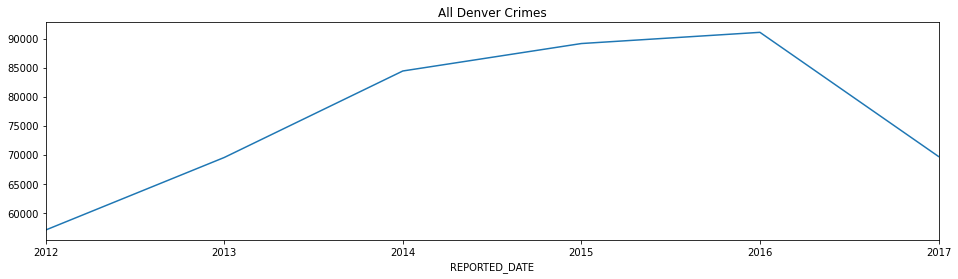

In [91]:
fig, ax = plt.subplots(figsize=(16, 4))
crime_sort.resample('Y').size().plot(title='All Denver Crimes', ax=ax)

#### Group by weekday and year

1. Note that 2017 data is incomplete. 

2. Crime seems to be rising every year but this data does not account for rising population. Let's read in a table for the Denver population for each year that we have data

Many crime metrics are reported as rates per 100,000 residents. Let's divide the population by 100,000 and then divide the raw crime counts by this number to get the crime rate per 100,000 residents

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
2012    6.34
Name: Population, dtype: float64

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
2012,1348,1385,1173,1133,1331,1291,1331
2013,1604,1642,1371,1305,1612,1609,1600
2014,1915,1935,1654,1552,1859,1879,1955
2015,1951,1978,1703,1562,1987,1967,1958
2016,2028,1978,1654,1522,2027,1924,2005
2017,2024,2017,1614,1540,1999,2015,2005


<AxesSubplot:xlabel='day'>

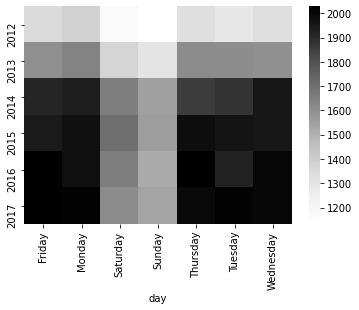

In [92]:
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
display(denver_pop)

den_100k = denver_pop.div(100_000).squeeze()
display(den_100k)

def update_2017(df_):
    df_.loc[2017] = (df_
        .loc[2017]
        .div(.748) 
        .astype('int')
    )
    return df_

crime = pd.read_hdf('data/crime.h5', 'crime') 

table = (crime
    .groupby(
        # All DataFrame columns / series containing Timestamps have access to numerous other attributes and methods with the .dt attribute
        [crime['REPORTED_DATE'].dt.year.rename('year'),
         crime['REPORTED_DATE'].dt.day_name().rename('day')])
    .size()
     # pivot the weekday level into horizontal column names with .unstack
    .unstack('day')
    .pipe(update_2017)
    .div(den_100k, axis='index')
    .astype(int)
)

display(table)

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(table, cmap='Greys', ax=ax)  

#### Grouping with anonymous functions with a DatetimeIndex

In [93]:
# the first function uses the .round DatetimeIndex method to round each value to the nearest second hour
# second function returns the .year attribute
funcs = [lambda idx: idx.round('2h').hour, lambda idx: idx.year]
(crime_sort
    .groupby(funcs) 
    [['IS_CRIME', 'IS_TRAFFIC']]
    .sum()
    .unstack()
    .style.highlight_max(color='lightgrey')
)

#### Grouping by a Timestamp and another column

The `.resample` method is unable to group by anything other than periods of time. The .groupby method, however, has the ability to group by both periods of time and other columns.

In [94]:
employee = pd.read_csv('data/employee.csv',
    parse_dates=['JOB_DATE', 'HIRE_DATE'],
    index_col='HIRE_DATE')

employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22
...,...,...,...,...,...,...,...,...,...
2014-06-09,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2015-06-09
2003-09-02,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2013-10-06
2014-10-13,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2015-10-13


In [95]:
# grouping by just gender, and find the average salary for each
(employee
    .groupby('GENDER')
    ['BASE_SALARY']
    .mean()
    .round(-2)
)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [96]:
#  average salary based on hire date, and group everyone into 10-year buckets
(employee
    .resample('10AS')
    ['BASE_SALARY']
    .mean()
    .round(-2)    
)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [97]:
# group by both gender and a ten-year time span
sal_final  = (employee
   .groupby(['GENDER', pd.Grouper(freq='10AS')]) 
   ['BASE_SALARY'] 
   .mean()
   .round(-2)
   .unstack('GENDER')
)

display(sal_final)


years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)

display(sal_final)

# There is a completely different way to do this recipe. We can use the cut function to create equal-width intervals based on the year that each employee was hired and form groups from it:

cuts = pd.cut(employee.index.year, bins=5, precision=0)
display(cuts.categories.values) 
display(employee
    .groupby([cuts, 'GENDER'])
    ['BASE_SALARY']
    .mean()
    .unstack('GENDER')
    .round(-2)
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


<IntervalArray>
[(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]]
Length: 5, closed: right, dtype: interval[float64]

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


## Index Alignment

Whenever a Series or DataFrame operates with another Series or DataFrame, the indexes (both the row index and column index) of each object align first before any operation begins. This index alignment happens behind the scenes and can be very surprising for those new to pandas. __This alignment always creates a Cartesian product between the indexes unless the indexes are identical.__

A Cartesian product is a mathematical term that usually appears in set theory. A Cartesian product between two sets is all the combinations of pairs of both sets. For example, the 52 cards in a standard playing card deck represent a Cartesian product between the 13 ranks (A, 2, 3,…, Q, K) and the four suits.

Producing a Cartesian product isn't always the intended outcome, but it's essential to be aware of how and when it occurs so as to avoid unintended consequences. In this recipe, two Series with overlapping but non-identical indexes are added together, yielding a surprising result. We will also show what happens if they have the same index.

__Example #1__

```python
>>> s1 = pd.Series(index=list("aaab"), data=np.arange(4))
>>> s1
a    0
a    1
a    2
b    3
dtype: int64
>>> s2 = pd.Series(index=list("cababb"), data=np.arange(6))
>>> s2
c    0
a    1
b    2
a    3
b    4
b    5
dtype: int64
```

```python
>>> s1 + s2
a    1.0
a    3.0
a    2.0
a    4.0
a    3.0
a    5.0
b    5.0
b    7.0
b    8.0
c    NaN
dtype: float64
```

Each a label in s1 pairs up with each a label in s2. This pairing produces six a labels, three b labels, and one c label in the resulting Series. A Cartesian product happens between all identical index labels.

As the element with label c is unique to the Series s2, pandas defaults its value to missing, as there is no label for it to align to in s1. pandas defaults to a missing value whenever an index label is unique to one object. This has the unfortunate consequence of changing the data type of the Series to a float, whereas each Series had only integers as values. The type change occurred because NumPy's missing value object, np.nan, only exists for floats but not for integers. Series and DataFrame columns must have homogeneous numeric data types. Therefore, each value in the column was converted to a float. Changing types makes little difference for this small dataset, but for larger datasets, this can have a significant memory impact.

__Example #2__

The Cartesian product is __not created__ when the indexes are unique or contain both the same exact elements and elements in the same order. When the index values are unique or they are the same and have the same order, a Cartesian product is not created, and the indexes instead align by their position. Notice here that each element aligned exactly by position and that the data type remained an integer:

``` python
>>> s1 = pd.Series(index=list("aaabb"), data=np.arange(5))
>>> s2 = pd.Series(index=list("aaabb"), data=np.arange(5))
>>> s1 + s2
a    0
a    2
a    4
b    6
b    8
dtype: int64

```

## Performance Tips

### Memory Tips

In [98]:
#  list limits for NumPy integer types
display(np.iinfo(np.int32))

# get information about floating-point numbers
display(np.finfo(np.float16))

# ask a DataFrame or Series how many bytes it is using with the .memory_usage method. 
# Note that this also includes the memory requirements of the index. 
# For pandas to extract the exact amount of memory of an object data type column, the deep parameter must be set to True
display(stocks.memory_usage())
display(stocks.Low.memory_usage())
display(stocks.memory_usage(deep=True))

iinfo(min=-2147483648, max=2147483647, dtype=int32)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

Index     48
Symbol    48
Shares    48
Low       48
High      48
dtype: int64

96

Index     237
Symbol    365
Shares     48
Low        48
High       48
dtype: int64

#### Reducing memory by changing data types

In [99]:
stocks_deep_copy = stocks.copy(deep=True)

# check max values before conversion
display(stocks_deep_copy.select_dtypes(np.int64).describe())

display(stocks_deep_copy.dtypes)
display(stocks_deep_copy.memory_usage())

# convert int64 to int16
stocks_deep_copy['Low'] = stocks_deep_copy['Low'].astype(np.int16)
stocks_deep_copy['High'] = stocks_deep_copy['High'].astype(np.int16)
stocks_deep_copy['Shares'] = stocks_deep_copy['Shares'].astype(np.int16)

display(stocks_deep_copy.dtypes)
display(stocks_deep_copy.memory_usage())

,Shares,Low,High
count,6.000000,6.000000,6.000000
mean,66.333333,220.666667,305.000000
std,39.403892,342.359265,424.841147
min,8.000000,23.000000,45.000000
25%,42.500000,23.000000,45.000000
50%,75.000000,79.000000,107.500000
75%,100.000000,198.750000,342.500000
max,100.000000,900.000000,1125.000000


Symbol    object
Shares     int64
Low        int64
High       int64
dtype: object

Index     48
Symbol    48
Shares    48
Low       48
High      48
dtype: int64

Symbol    object
Shares     int16
Low        int16
High       int16
dtype: object

Index     48
Symbol    48
Shares    12
Low       12
High      12
dtype: int64

#### Convert to Categorical Data

Consider changing object data types to categorical if they have a reasonably low cardinality (number of unique values)

In [100]:
stocks_deep_copy = stocks.copy(deep=True)

display(stocks_deep_copy)

display(stocks_deep_copy.Symbol.dtype)

print('Num of unique values = ', stocks_deep_copy.select_dtypes(include=["object"]).nunique())
stocks_deep_copy['Symbol'] = stocks_deep_copy['Symbol'].astype("category")

display(stocks_deep_copy.Symbol.dtype)

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400
4,NVDA,100,23,45
five,ZNGA,100,23,45
5,TTM,100,23,45


dtype('O')

Num of unique values =  Symbol    6
dtype: int64


CategoricalDtype(categories=['AAPL', 'AMZN', 'NVDA', 'TSLA', 'TTM', 'ZNGA'], ordered=False)

### Sorted and Unique Indexes are quicker

__Index lookup vs Compound Filtering__

Index lookup is much quicker


``` python
>>> %%timeit
>>> crit1 = college["CITY"] == "Miami"
>>> crit2 = college["STABBR"] == "FL"
>>> college[crit1 & crit2]
3.05 ms ± 66.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
>>> %timeit college.loc['Miami, FL']
369 µs ± 130 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
```

college2's index is not unique and not sorted. __College3's index is unique and sorted and thus has a much quicker index lookup time__:
``` python
>>> %timeit college[college['STABBR'] == 'TX']
1.75 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
>>> %timeit college2.loc['TX']
1.09 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
>>> %timeit college3.loc['TX']
304 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
```

### Exporting to type tracking formats:

Once you have your data in a format you like, you can save it in a binary format that tracks types, such as the Feather format (pandas leverages the pyarrow library to do this).

#### Feather format

Feather is a fast, lightweight, and easy-to-use binary file format for storing data frames. It has a few specific design goals:

* Lightweight, minimal API: make pushing data frames in and out of memory as simple as possible
* Language agnostic: Feather files are the same whether written by Python or R code. Other languages can read and write Feather files, too.
* High read and write performance. When possible, Feather operations should be bound by local disk performance.
* This format is meant to enable in-memory transfer of structured data between languages and optimized so that data can be used as is without internal conversion.

Look at DataFrame's `to_feather` and `pd.read_feather` method.

#### Parquet format

Whereas Feather optimizes the binary data for the in-memory structure, Parquet optimizes for the on-disk format. 

Look at DataFrame's `to_fparquet` and `pd.read_parquetr` method.

Right now there is some conversion required for pandas to load data from both Parquet and Feather. But both are quicker than CSV and persist types.

#### hdf5 files

One of the features of hdf5 files is their ability to preserve the data types of each column, which reduces the memory required. In this case, three of these columns are stored as a pandas category instead of as an object. Storing them as objects will lead to a four times increase in memory usage:

```python
>>> mem_cat = crime.memory_usage().sum()
>>> mem_obj = (crime
...    .astype({'OFFENSE_TYPE_ID':'object',
...             'OFFENSE_CATEGORY_ID':'object',
...            'NEIGHBORHOOD_ID':'object'}) 
...    .memory_usage(deep=True)
...    .sum()
... )
>>> mb = 2 ** 20
>>> round(mem_cat / mb, 1), round(mem_obj / mb, 1)
(29.4, 122.7)
```

### Sorted DateTime index

Our original crimes DataFrame was not sorted and slicing still worked as expected. Sorting the index will lead to large gains in performance:

```python
>>> %timeit crime.loc['2015-3-4':'2016-1-1']
12.2 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
>>> crime_sort = crime.sort_index()
>>> %timeit crime_sort.loc['2015-3-4':'2016-1-1']
1.44 ms ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
```

Having the date information in the index provides a slight speed improvement. If you need to perform date slicing on a single column, it might make sense to set the index to a date column. Note that there is also overhead for setting the index to a column, and if you are only slicing a single time, the overhead makes the time for these two operations about the same.

```python
>>> ctseries = crime.set_index('REPORTED_DATE')
>>> %timeit ctseries.loc['2015-3-4':'2016-1-1']
11 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
>>> %timeit crime[crime.REPORTED_DATE.between('2015-3-4','2016-1-1')]
20.1 ms ± 525 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

## pandas profiling library

There is a third-party library, pandas Profiling (https://pandas-profiling.github.io/pandas-profiling/docs/), that creates reports for each column. These reports are similar to the output of the .describe method, but include plots and other descriptive statistics.

In [101]:
import pandas_profiling as pp

# pp.ProfileReport(stocks)

## Visualization

The primary data visualization library in Python is matplotlib, a project begun in the early 2000s, that was built to mimic the plotting capabilities from Matlab. Matplotlib is enormously capable of plotting most things you can imagine, and it gives its users tremendous power to control every aspect of the plotting surface.

That said, it is not the friendliest library for beginners to grasp. Thankfully, pandas makes visualizing data very easy for us and usually plots what we want with a single call to the `plot` method. pandas does no plotting on its own. It internally calls matplotlib functions to create the plots.

Seaborn is also a visualization library that wraps matplotlib and does not do any actual plotting itself. Seaborn makes beautiful plots and has many types of plots that are not available from matplotlib or pandas. Seaborn works with tidy (long) data, while pandas works best with aggregated (wide) data. Seaborn also accepts pandas DataFrame objects in its plotting functions.

Although it is possible to create plots without ever running any matplotlib code, from time to time, it will be necessary to use it to tweak finer plot details manually. For this reason, the first two recipes will cover some basics of matplotlib that will come in handy if you need to use it. Other than the first two recipes, all plotting examples will use pandas or seaborn.

Visualization in Python does not have to rely on matplotlib. [Bokeh is quickly becoming a very popular interactive visualization library targeted for the web. It is completely independent of matplotlib, and it's capable of producing entire applications. There are other plotting libraries as well and future versions of pandas will probably have the capability to use plotting engines other than matplotlib.

One thing to be aware if you are a Jupyter user. You will want to include the:

`%matplotlib inline`

This tells matplotlib to render plots in the notebook.

### mathplotlib overview

#### matplotlib hierarchy

Matplotlib uses a hierarchy of objects to display all of its plotting items in the output. This hierarchy is key to understanding everything about matplotlib. The __Figure__ and __Axes__ objects are the two main components of the hierarchy. __The Figure object is at the top of the hierarchy and is the container for everything that will be plotted. Contained within the Figure is one or more Axes object(s). The Axes is the primary object that you will interact with when using matplotlib and can be thought of as the plotting surface. The Axes contains an x-axis, a y-axis, points, lines, markers, labels, legends, and any other useful item that is plotted.__

A distinction needs to be made between an Axes and an axis. They are completely separate objects. An Axes object, using matplotlib terminology, is not the plural of axis but instead, as mentioned earlier, the object that creates and controls most of the useful plotting elements. An axis refers to the x or y (or even z) axis of a plot.

All of these useful plotting elements created by an Axes object are called artists. Even the Figure and the Axes objects themselves are artists. This distinction for artists won't be critical to this recipe but will be useful when doing more advanced matplotlib plotting and especially when reading through the documentation.

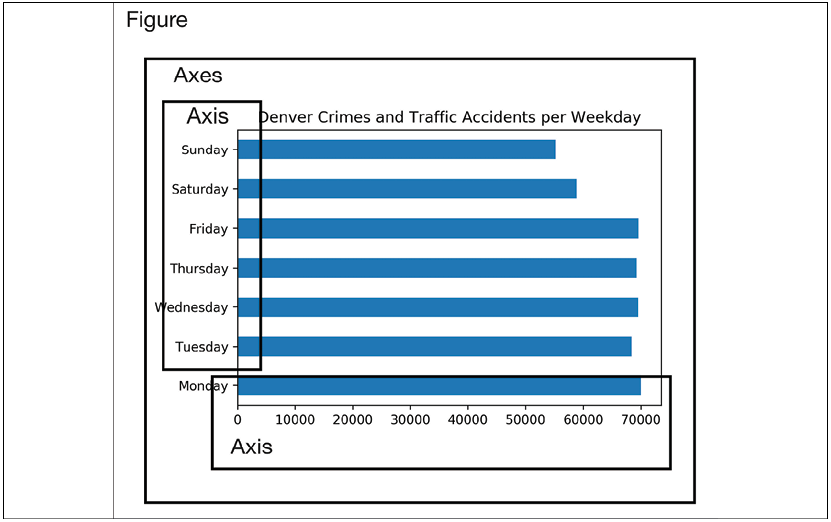

#### Object-oriented guide to matplotlib

Matplotlib provides two distinct interfaces for users.

##### Stateful interface
The stateful interface makes all of its calls with the `pyplot` module. This interface is called stateful because matplotlib keeps track internally of the current state of the plotting environment. Whenever a plot is created in the stateful interface, matplotlib finds the current figure or current axes and makes changes to it. This approach is fine to plot a few things quickly but can become unwieldy when dealing with multiple figures and axes.

##### Stateless interface (object oriented)
Matplotlib also offers a stateless, or object-oriented, interface in which you explicitly use variables that reference specific plotting objects. Each variable can then be used to change some property of the plot. The object-oriented approach is explicit, and you are always aware of exactly what object is being modified.

Unfortunately, having both options can lead to lots of confusion, and matplotlib has a reputation for being difficult to learn. The documentation has examples using both approaches. __In practice, I find it most useful to combine them. I use the `subplots` function from `pyplot` to create a figure and axes, and then use the methods on those objects.__

If you are new to matplotlib, you might not know how to recognize the difference between each approach. With the stateful interface, all commands are functions called on the `pyplot` module, which is usually aliased `plt`. Making a line plot and adding some labels to each axis would look like this:

Text(0.5, 1.03, 'Figure Title')

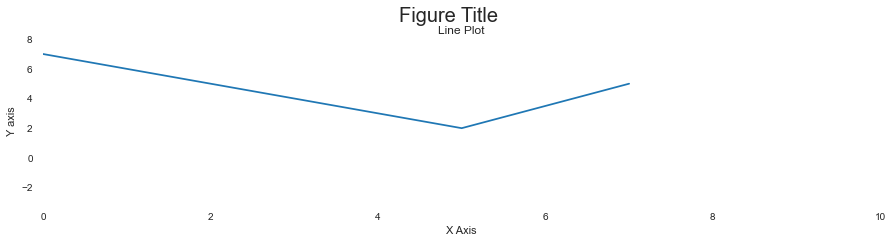

In [102]:
# Stateful interface

import matplotlib.pyplot as plt
x = [-3, 5, 7]
y = [10, 2, 5]
fig = plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

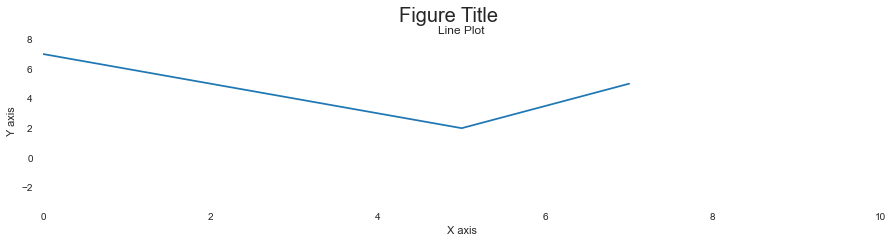

In [103]:
# Stateless interface (object oriented)

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.core.display import display
fig = Figure(figsize=(15, 3))
FigureCanvas(fig)  
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

display(fig)

Text(0.5, 1.03, 'Figure Title')

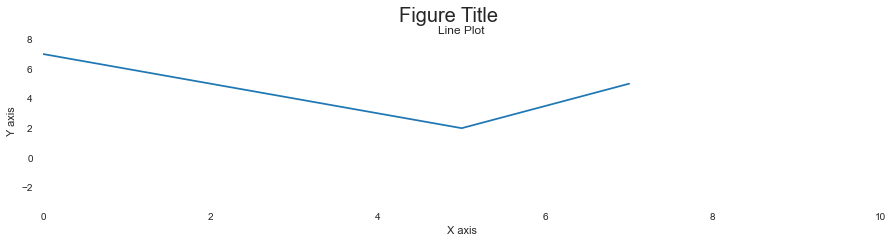

In [104]:
# Hybrid

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set(xlim=(0, 10), ylim=(-3, 8),
    xlabel='X axis', ylabel='Y axis',
    title='Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

#### Using stateful and stateless mathplot interfaces together

matplotlib.figure.Figure

matplotlib.axes._subplots.AxesSubplot

array([8. , 5.5])

[<AxesSubplot:>]

True

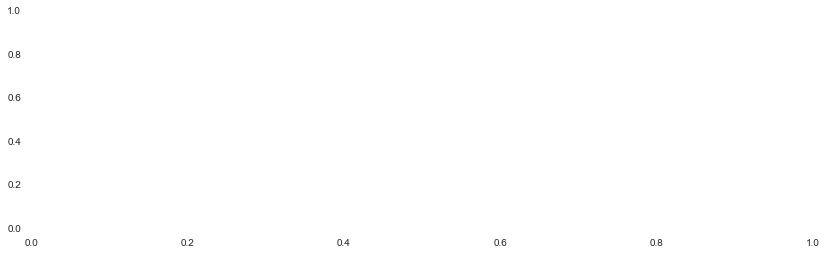

In [105]:
# use the subplots function to create a figure with a single axes
fig, ax = plt.subplots(nrows=1, ncols=1) 

display(type(fig))
display(type(ax))

display(fig.get_size_inches())
fig.set_size_inches(14, 4)

display(fig.axes)
display(fig.axes[0] is ax)

OrderedDict([('left', <matplotlib.spines.Spine at 0x1be6e6cc070>),
             ('right', <matplotlib.spines.Spine at 0x1be6e6e7280>),
             ('bottom', <matplotlib.spines.Spine at 0x1be6e6e7220>),
             ('top', <matplotlib.spines.Spine at 0x1be6e6e7ee0>)])

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

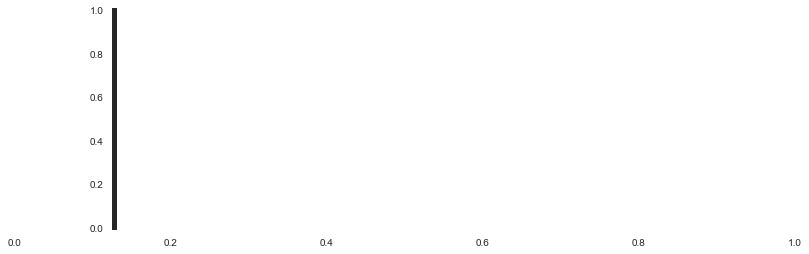

In [106]:
# The spines represent the data boundaries and are the four physical lines that you see bordering the darker gray rectangle (the axes).
spines = ax.spines
display(spines)

# The x and y axis objects contain more plotting objects such as the ticks and their labels and the label of the entire axis.
display(ax.get_children())

# modify left and bottom spines
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)

display(fig)

findfont: Font family ['Gotham'] not found. Falling back to DejaVu Sans.


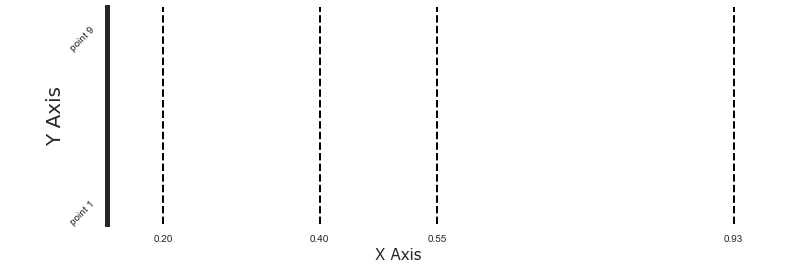

In [107]:
# some axis properties

ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Gotham', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
     
display(fig)

## Methods List

Overview of some useful methods:

__Index__: `s` = series, `df` = DataFrame

1. `df.mean(), df.std() and df.quantile()` - Get a statical summary of the data.
2. `df.select_dtypes("int64").describe()` - Describe all columns of data type `int64`. This can be useful to convert column to a smaller datatype after checking the max in the output for each column
3. `s/df.nunique()` - # of unique values
4. `df.head(), df.tail(), df.sample()` - Get some samples from DataSet
5. `pd.isna()` - Detect missing values for an array-like object.
6. `s.str.replace/split` - Replace and Split operations on Strings
7. [`df.agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) - Aggregate using one or more operations over the specified axis.
8. [`s/df.cov`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html) - Compute pairwise covariance of columns, excluding NA/null values.
9. [`s/df.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html) - Compute pairwise correlation of columns, excluding NA/null values.

# Exporting Notebook
`jupyter nbconvert --to html_embed --template toc2 .\pandas.ipynb`